In [2]:
import pandas as pd
from sklearn.metrics import mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
link = 'https://raw.githubusercontent.com/61050960/Dataset/main/pima-indians-diabetes1.csv?raw=true'
df = pd.read_csv(link)
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
def MI(dat):
  sum = 0
  for i in dat:
    X = df.iloc[:,i]
    y = df.iloc[:,-1]
    MI_score = mutual_info_score(X,y)
    sum += MI_score
  return sum

#งานที่1

#SFS

In [ ]:
max = []
max_s = 0
count_i = len(df.columns) # จำนวน รอบ
count_j =list(range(len(df.columns)-1)) # Create list index เพื่อใช้บอก ตน. คอลัม [0,1,2,3,4,5,7]
column_old = -1
for i in range(count_i):
  for j in count_j: # ไว้เพิ่มค่า ทดลองจับคู่เพื่อเอามาหาค่า MI 
    copy = max.copy()
    copy.append(j)
    if(max_s < MI(copy)): #check MI หา Max
      max_s = MI(copy)
      column_new = j
  if(column_old != column_new): # ไว้เช็ค มีคอลัมใหม่ที่ดีกว่าไหม
    column_old = column_new
    max.append(column_old)
    count_j.remove(column_old)
print(max,MI(max))


[6, 5, 1, 4, 7, 3, 0, 2] 1.3306790760532268


[0.45118180206849473, 0.6894931689079999, 0.9003493225175203, 1.0924166138788884, 1.1901093366348472, 1.2467147468716304, 1.2895688081444021, 1.3306790760532268]
['6', '6 5', '6 5 1', '6 5 1 4', '6 5 1 4 7', '6 5 1 4 7 3', '6 5 1 4 7 3 0', '6 5 1 4 7 3 0 2']


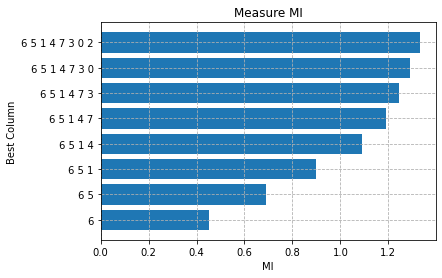

In [ ]:
y = []
y_s = []
score = []
count = 0
for i in max:
  y.append(i)
  yc = y.copy()
  str1 = " ".join(str(x) for x in yc)
  y_s.append(str1)
  count = MI(y)
  score.append(count)
print(score)
print(y_s)
plt.barh(y_s,score)
plt.grid(ls = '--')
plt.xlabel('MI')
plt.ylabel('Best Column')
plt.title('Measure MI')
plt.show()
  

#SBS

In [ ]:
max1 = list(range(len(df.columns)-1))
max_s = MI(max1)
count_i = len(df.columns)
column_old = -1
column_new = -1
for i in range(count_i): #loop ตามจำนวนตัวทั้งหมด
  count_j = max1.copy() 
  for j in count_j: #loop เพือหาตัวที่เอาออกแล้วมีค่ามากที่สุด
    copy = max1.copy() #copy ค่า max มาใส่เพื่อหาตัวถัดไปที่ควรเอาออก
    copy.remove(j) #ลบตัวในรอบนั้น
    if(max_s<MI(copy)): #if ไว้เช็คมาเอาออกแล้วค่ามากขึ้นไหม
      print(max_s,MI(copy))
      max_s = MI(copy)
      column_new = j
  if(column_old != column_new): #if เช็คว่าเอาออกแล้วมีค่ามากสุดยังซ้ำกับตัวเดิมไหม เพื่อกันการที่เอาค่าออกแล้วทำให้ค่า MI น้อยลงกว่าเดิม
    column_old = column_new
    max1.remove(column_old) #ลบออกค่าที่ควรเอาออกจาก max
print(max1,MI(max))  

[0, 1, 2, 3, 4, 5, 6, 7] 1.3306790760532268


[0.04285406127277179, 0.25371021488229223, 0.2948204827911168, 0.3514258930279, 0.5434931843892681, 0.7818045512287732, 1.232986353297268, 1.3306790760532268]
['0', '0 1', '0 1 2', '0 1 2 3', '0 1 2 3 4', '0 1 2 3 4 5', '0 1 2 3 4 5 6', '0 1 2 3 4 5 6 7']


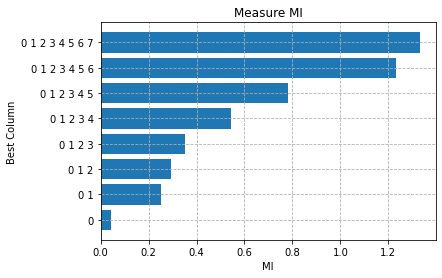

In [ ]:
y = []
y_s = []
score = []
count = 0
for i in max1:
  y.append(i)
  yc = y.copy()
  str1 = " ".join(str(x) for x in yc)
  y_s.append(str1)
  count = MI(y)
  score.append(count)
print(score)
print(y_s)
plt.barh(y_s,score)
plt.grid(ls = '--')
plt.xlabel('MI')
plt.ylabel('Best Column')
plt.title('Measure MI')
plt.show()
  

#SFFS

In [ ]:
max_Global = 0
max_list_Global = []
max_list1 = []
max_list2 = []
index_col = list(range(len(df.columns)-1)) #[0,1,2,3,4,5,6,7]
index_col_SBS = list(range(len(df.columns)-1))
for i in range(len(df.columns)-1):
  max_local1 = 0
  max_local2 =0
  for j in index_col:
    if j in max_list1:
      continue
    copy = max_list1.copy()
    copy.append(j)
    if(max_local1 < MI(copy)):
      max_local1 = MI(copy)
      column_new_SFS = j
  max_list1.append(column_new_SFS)
    #SFS
  if( i >= 3):
    copy_list = max_list1.copy() 
    for k in copy_list:
      temp = max_list1.copy()
      temp.remove(k)
      for m in index_col_SBS:
        if m in temp:
          continue
        temp2 = temp.copy()
        temp2.append(m)
        if(max_local2 < MI(temp2)):
          max_local2 = MI(temp2)
          max_list2 = temp2.copy()
    #SBS
  if(max_local1 < max_local2):
    max_list1 = max_list2.copy()
    max_local1 = max_local2
  if(max_Global < MI(max_list1)):
    max_Global = max_local1
    max_list_Global = max_list1.copy()
print(max_list_Global,MI(max_list_Global))
print(max_list1,MI(max_list1))

[5, 1, 4, 7, 3, 0, 6, 2] 1.330679076053227
[5, 1, 4, 7, 3, 0, 6, 2] 1.330679076053227


[0.2383113668395052, 0.44916752044902564, 0.6412348118103938, 0.7389275345663525, 0.7955329448031357, 0.8383870060759075, 1.2895688081444023, 1.330679076053227]
['5', '5 1', '5 1 4', '5 1 4 7', '5 1 4 7 3', '5 1 4 7 3 0', '5 1 4 7 3 0 6', '5 1 4 7 3 0 6 2']


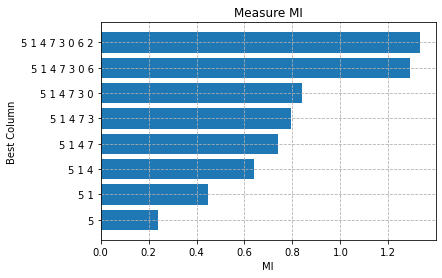

In [ ]:
y = []
y_s = []
score = []
count = 0
for i in max_list_Global:
  y.append(i)
  yc = y.copy()
  str1 = " ".join(str(x) for x in yc)
  y_s.append(str1)
  count = MI(y)
  score.append(count)
print(score)
print(y_s)
plt.barh(y_s,score)
plt.grid(ls = '--')
plt.xlabel('MI')
plt.ylabel('Best Column')
plt.title('Measure MI')
plt.show()
 

# กราฟวัดประสิทธิภาพ

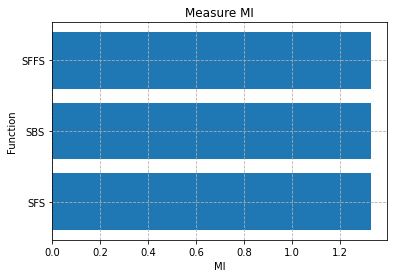

In [ ]:
y = ["SFS","SBS","SFFS"]
x = [MI(max),MI(max1),MI(max_list_Global)]
plt.barh(y,x)
plt.grid(ls = '--')
plt.xlabel('MI')
plt.ylabel('Function')
plt.title('Measure MI')
plt.show()

# **สรุป**
SFS มีคะแนน MI = 1.330679076053227<br>
SBS มีคะแนน MI = 1.330679076053227<br>
SFFS มีคะแนน MI = 1.330679076053227<br>
ทั้งสามวิธีได้คอลัมออกมาเหมือนกันจึงทำให้ คะแนนเท่ากัน<br>แต่วิธีที่ดีที่สุดในสามวิธีนี้คือ SFFS เพราะมีการรีเช็คกันระหว่างการทำงานโดยใช้วิธี SFS SBS <br>
ปัญหา<br>SFS SBS เพราะวิธีที่ผมทำจะเป็นแบบ greedy เมื่อเจอการใส่คอลัมแล้วทำให้ค่า MI ลดลงจะหยุด จึงติดปัญหา local maximum อาจจะมีคำตอบที่ดีกว่าแต่ไปไม่ถึง<br>
SFFS จะทำงานไปจนสุดทางและจะมีการจำคำตอบที่ดีที่สุดที่เกิดขึ้นในระหว่างทาง เพื่อแก้ไขปัญหา local maximum


# SFS for Library

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
knn = KNeighborsClassifier(n_neighbors=2)


# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=8,
          n_jobs=-1)
sfs = sfs.fit(X, y)
sfs1 = sfs.k_feature_idx_

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6458333333333334, 0.6979166666666666, 0.645...",0.684896,"(1,)",0.0293318,0.0336532,0.0127197
2,"(1, 5)","[0.71875, 0.71875, 0.6875, 0.7083333333333334,...",0.721354,"(1, 5)",0.0255789,0.0293475,0.0110923
3,"(1, 5, 6)","[0.71875, 0.7291666666666666, 0.72916666666666...",0.727865,"(1, 5, 6)",0.0205222,0.0235458,0.00889946
4,"(1, 4, 5, 6)","[0.75, 0.71875, 0.71875, 0.6875, 0.77083333333...",0.720052,"(1, 4, 5, 6)",0.023341,0.0267799,0.0101219
5,"(1, 3, 4, 5, 6)","[0.7395833333333334, 0.65625, 0.69791666666666...",0.701823,"(1, 3, 4, 5, 6)",0.0217412,0.0249443,0.00942807
6,"(1, 2, 3, 4, 5, 6)","[0.6770833333333334, 0.75, 0.71875, 0.72916666...",0.710938,"(1, 2, 3, 4, 5, 6)",0.0206785,0.0237251,0.00896724
7,"(0, 1, 2, 3, 4, 5, 6)","[0.6770833333333334, 0.7291666666666666, 0.718...",0.713542,"(0, 1, 2, 3, 4, 5, 6)",0.0128397,0.0147314,0.00556794
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6666666666666666, 0.75, 0.65625, 0.6875, 0....",0.710938,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0293318,0.0336532,0.0127197


In [6]:
sbs = SFS(knn, 
          k_features=8, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=8,
          n_jobs=-1)
sbs = sbs.fit(X, y)

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
8,0.710938,0.0293318,"[0.6666666666666666, 0.75, 0.65625, 0.6875, 0....","(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.0336532,0.0127197


In [7]:
sffs = SFS(knn, 
           k_features=8, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=8,
           n_jobs=-1)
sffs = sffs.fit(X, y)
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6458333333333334, 0.6979166666666666, 0.645...",0.684896,"(1,)",0.0293318,0.0336532,0.0127197
2,"(1, 5)","[0.71875, 0.71875, 0.6875, 0.7083333333333334,...",0.721354,"(1, 5)",0.0255789,0.0293475,0.0110923
3,"(1, 5, 6)","[0.71875, 0.7291666666666666, 0.72916666666666...",0.727865,"(1, 5, 6)",0.0205222,0.0235458,0.00889946
4,"(1, 4, 5, 6)","[0.75, 0.71875, 0.71875, 0.6875, 0.77083333333...",0.720052,"(1, 4, 5, 6)",0.023341,0.0267799,0.0101219
5,"(1, 3, 4, 5, 6)","[0.7395833333333334, 0.65625, 0.69791666666666...",0.701823,"(1, 3, 4, 5, 6)",0.0217412,0.0249443,0.00942807
6,"(1, 2, 3, 4, 5, 6)","[0.6770833333333334, 0.75, 0.71875, 0.72916666...",0.710938,"(1, 2, 3, 4, 5, 6)",0.0206785,0.0237251,0.00896724
7,"(0, 1, 2, 4, 5, 6, 7)","[0.6875, 0.7604166666666666, 0.677083333333333...",0.721354,"(0, 1, 2, 4, 5, 6, 7)",0.0286206,0.0328373,0.0124113
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6666666666666666, 0.75, 0.65625, 0.6875, 0....",0.710938,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0293318,0.0336532,0.0127197


# สมาชิก
นายพรทวี ทวีสินธุ์ รหัส 61050246<br>
นายฟาริซ หะยีมะสาและ รหัส 61050258